In [1]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pylab as plt
%matplotlib inline

## ベイズ推論って？

・不確実なものは不確実のままにする

・確率を「ある出来事がどれくらい信頼できるか」（belief、信念）を表す指標と解釈する

・頻度主義の推論は推定値を返し、ベイズ主義の推論は「確率」を返す

・以下のベイス則により、事前分布$ P(A) $を尤度P(X|A)とP(X)で更新し、事後分布$ P(A|X)$とする

$$ P(A|X) = P(X|A)P(A) / P(X) $$

・ハイパーパラメータの分布から推論、確からしさを計算する

・ほかの考え方との違い

1. 最尤推定（データから尤もxが起きやすいθを計算）

$$ θ_{ML} = \underset{θ}{\operatorname{argmax}}{P(x|θ)}$$ 

2. MAP(Mazximize A Posteriori)推定

$$ θ_{MAP} = \underset{θ}{\operatorname{argmax}}{P(x|θ)P(θ)}$$ 

3. ベイズ推論

$$ P(θ|x) = P(θ|x)P(θ) / P(x) $$

## コインの表がでる確率pをベイズ推論

In [2]:
# 真の分布とそれから得られた観測データ
p_true = 0.5
size = 1000
data = stats.bernoulli.rvs(p=p_true, size=size)

(array([484.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 516.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

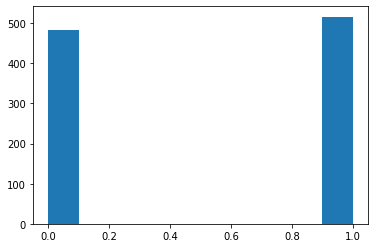

In [3]:
# データの分布を表示
plt.hist(data)

In [4]:
# 推定するパラメータp（コインが表になる確率）の事前分布
N = 60
prior = [np.linspace(0,1,N), np.ones(N)/N] # 一様分布

# prior[0]：パラメータpの値
# prior[1]：パラメータpの確からしさ、確率
prior

[array([0.        , 0.01694915, 0.03389831, 0.05084746, 0.06779661,
        0.08474576, 0.10169492, 0.11864407, 0.13559322, 0.15254237,
        0.16949153, 0.18644068, 0.20338983, 0.22033898, 0.23728814,
        0.25423729, 0.27118644, 0.28813559, 0.30508475, 0.3220339 ,
        0.33898305, 0.3559322 , 0.37288136, 0.38983051, 0.40677966,
        0.42372881, 0.44067797, 0.45762712, 0.47457627, 0.49152542,
        0.50847458, 0.52542373, 0.54237288, 0.55932203, 0.57627119,
        0.59322034, 0.61016949, 0.62711864, 0.6440678 , 0.66101695,
        0.6779661 , 0.69491525, 0.71186441, 0.72881356, 0.74576271,
        0.76271186, 0.77966102, 0.79661017, 0.81355932, 0.83050847,
        0.84745763, 0.86440678, 0.88135593, 0.89830508, 0.91525424,
        0.93220339, 0.94915254, 0.96610169, 0.98305085, 1.        ]),
 array([0.01666667, 0.01666667, 0.01666667, 0.01666667, 0.01666667,
        0.01666667, 0.01666667, 0.01666667, 0.01666667, 0.01666667,
        0.01666667, 0.01666667, 0.01666667, 0.

(0, 1)

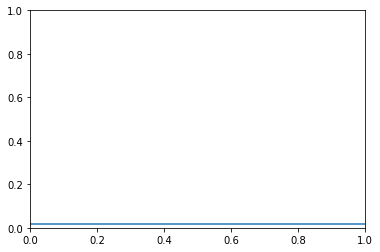

In [5]:
# 事前分布を表示
plt.plot(prior[0],prior[1])
plt.xlim([0,1])
plt.ylim([0,1])

In [6]:
# データを使って分布を更新
def update(prior, data, N):
    
    # dataを表示
    print("observed data : ", data)
    
    # 事前分布をコピー
    posterior = np.copy(prior)
    
    # P(X) = ΣP(X|A)P(A)を計算
    p_x = np.sum(prior[1] * (data * prior[0] + (1 - data) * (1 - prior[0])))
    
    # 各事前分布P(A)に対して
    for i in range(N):
        # いま得られたデータを使い、P(X|A)を計算
        # パラメータpの時に、表（もしくは裏）が得られる確率を算出
        p_xa = data * prior[0][i] + (1 - data) * (1 - prior[0][i]) # こいつ（尤度）がキモ

        # 事後分布を更新、P(A|X) = P(A) * P(X|A) / P(X)
        posterior[1][i] = prior[1][i] * p_xa / p_x
        
    return posterior

observed data :  0


(0, 1)

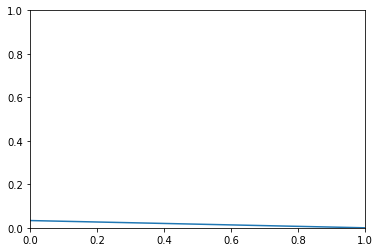

In [7]:
# 0（裏）が得られた時の事後分布
posterior = update(prior, 0, N)
plt.plot(posterior[0],posterior[1])
plt.xlim([0,1])
plt.ylim([0,1])

observed data :  1


(0, 1)

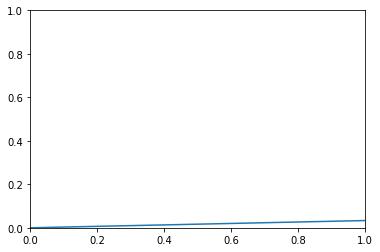

In [8]:
# 1（表）が得られた時の事後分布
posterior = update(prior, 1, N)
plt.plot(posterior[0],posterior[1])
plt.xlim([0,1])
plt.ylim([0,1])

observed data :  0
observed data :  0
observed data :  0
observed data :  1
observed data :  1


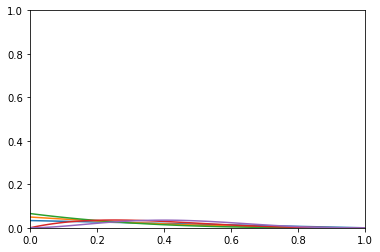

In [9]:
# ５個の観測データで分布を更新してみる
p = prior
for i in range(5):
    p = update(p, data[i], N)
    plt.plot(p[0],p[1])
    plt.xlim([0,1])
    plt.ylim([0,1])

observed data :  0
observed data :  0
observed data :  0
observed data :  1
observed data :  1
observed data :  0
observed data :  0
observed data :  0
observed data :  0
observed data :  0
observed data :  0
observed data :  1
observed data :  1
observed data :  1
observed data :  1
observed data :  0
observed data :  1
observed data :  1
observed data :  1
observed data :  1


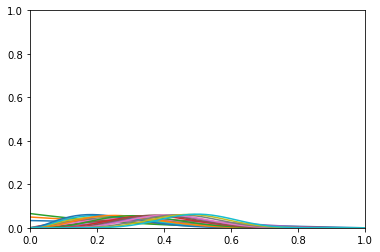

In [10]:
# 20個の観測データで分布を更新してみる
p = prior
for i in range(20):
    p = update(p, data[i], N)
    plt.plot(p[0],p[1])
    plt.xlim([0,1])
    plt.ylim([0,1])

observed data :  0
observed data :  0
observed data :  0
observed data :  1
observed data :  1
observed data :  0
observed data :  0
observed data :  0
observed data :  0
observed data :  0
observed data :  0
observed data :  1
observed data :  1
observed data :  1
observed data :  1
observed data :  0
observed data :  1
observed data :  1
observed data :  1
observed data :  1
observed data :  0
observed data :  0
observed data :  1
observed data :  1
observed data :  1
observed data :  0
observed data :  1
observed data :  1
observed data :  0
observed data :  1
observed data :  1
observed data :  0
observed data :  0
observed data :  0
observed data :  0
observed data :  1
observed data :  1
observed data :  1
observed data :  1
observed data :  1
observed data :  1
observed data :  1
observed data :  1
observed data :  0
observed data :  0
observed data :  1
observed data :  1
observed data :  0
observed data :  0
observed data :  0
observed data :  0
observed data :  0
observed dat

observed data :  0
observed data :  1
observed data :  1
observed data :  0
observed data :  1
observed data :  1
observed data :  0
observed data :  1
observed data :  0
observed data :  0
observed data :  0
observed data :  0
observed data :  1
observed data :  0
observed data :  0
observed data :  1
observed data :  1
observed data :  0
observed data :  0
observed data :  1
observed data :  0
observed data :  0
observed data :  1
observed data :  0
observed data :  1
observed data :  1
observed data :  0
observed data :  1
observed data :  0
observed data :  1
observed data :  0
observed data :  1
observed data :  0
observed data :  0
observed data :  0
observed data :  0
observed data :  0
observed data :  0
observed data :  0
observed data :  0
observed data :  1
observed data :  0
observed data :  1
observed data :  1
observed data :  0
observed data :  1
observed data :  0
observed data :  0
observed data :  1
observed data :  1
observed data :  1
observed data :  1
observed dat

observed data :  1
observed data :  0
observed data :  0
observed data :  1
observed data :  0
observed data :  0
observed data :  0
observed data :  0
observed data :  1
observed data :  1
observed data :  0
observed data :  1
observed data :  0
observed data :  0
observed data :  1
observed data :  1
observed data :  1
observed data :  0
observed data :  1
observed data :  0
observed data :  1
observed data :  1
observed data :  0
observed data :  1
observed data :  1
observed data :  1
observed data :  1
observed data :  0
observed data :  0
observed data :  1
observed data :  1
observed data :  0
observed data :  1
observed data :  0
observed data :  0
observed data :  0
observed data :  1
observed data :  0
observed data :  1
observed data :  1
observed data :  0
observed data :  0
observed data :  1
observed data :  1
observed data :  0
observed data :  0
observed data :  1
observed data :  0
observed data :  1
observed data :  1
observed data :  1
observed data :  0
observed dat

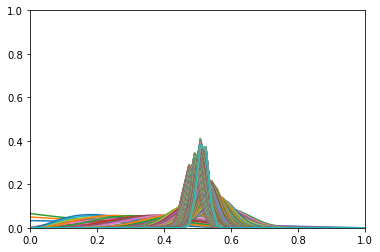

In [11]:
# 1000個の観測データで分布を更新してみる
p = prior
for i in range(1000):
    p = update(p, data[i], N)
    plt.plot(p[0],p[1])
    plt.xlim([0,1])
    plt.ylim([0,1])

(0, 1)

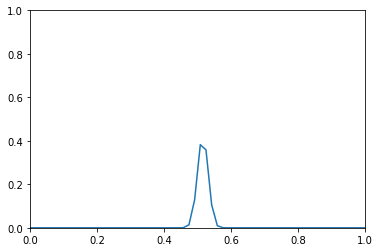

In [12]:
# 最終的な分布
plt.plot(p[0],p[1])
plt.xlim([0,1])
plt.ylim([0,1])

## pyMCを使ってMCMCでやってみる

MCMC…マルコフ連鎖モンテカルロ法、ランダムにサンプリングしてもっともらしい事後分布を求める（結構力技？）

logp = -693.15, ||grad|| = 16: 100%|██████████| 6/6 [00:00<00:00, 393.42it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains, 0 divergences: 100%|██████████| 3000/3000 [00:04<00:00, 609.92draws/s]
The acceptance probability does not match the target. It is 0.8909333407771753, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123a7eac8>,
      dtype=object)

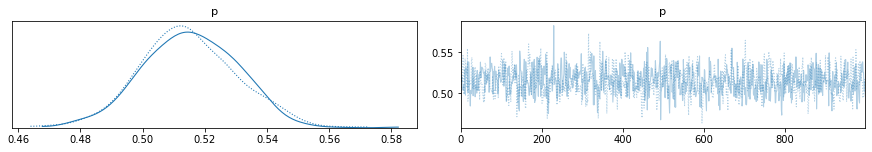

In [13]:
with pm.Model() as model:
    # パラメータpの事前分布(一様分布を設定)
    p = pm.Uniform('p', 0, 1)

    # コイン投げの試行はベルヌーイ分布で表現
    obs = pm.Bernoulli('obs', p = p, observed = data)

    # モデルを定義してサンプリングすることで事後分布を求める
    start = pm.find_MAP()#初期値を最大事後確率とする
    trace = pm.sample(1000, start = start)

burnin = 100
chain = trace[burnin:]#最初のburnin個のデータを抜く→これは最初の方のデータが当てにならないため
pm.traceplot(trace)

In [15]:
ppc = pm.sample_posterior_predictive(trace, samples=500, model=model)

/usr/local/lib/python3.7/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 500/500 [00:00<00:00, 540.97it/s]


In [18]:
ppc['obs'].mean()

0.517564